## importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## importing the dataset

In [4]:
dataset=pd.read_csv("Ads_CTR_Optimisation.csv")

## implementing UCB

In [7]:
import math
N=10000
d=10
ads_selected=[]
numbers_of_selections=[0]*10000
sums_of_rewards=[0]*10000
total_reward=0
for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if(numbers_of_selections[i]>0):
            average_reward=sums_of_rewards[i]/numbers_of_selections[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward+delta_i
        else:
            upper_bound=1e400
        if(upper_bound > max_upper_bound):
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    numbers_of_selections[ad]+=1
    reward=dataset.values[n,ad]
    sums_of_rewards[ad]+=reward
    total_reward+=reward
print(total_reward)

2178


## visualising the result

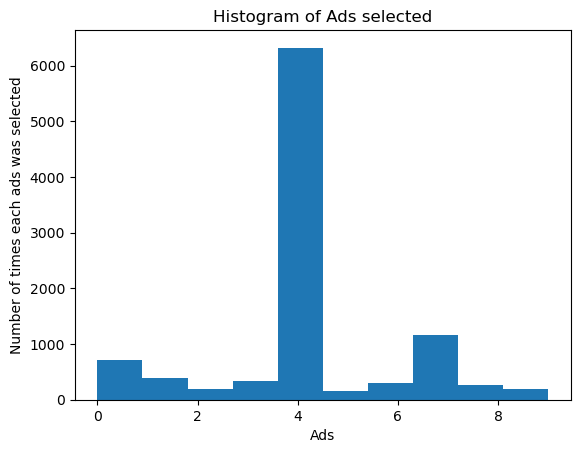

In [6]:
plt.hist(ads_selected)
plt.title("Histogram of Ads selected")
plt.xlabel("Ads")
plt.ylabel("Number of times each ads was selected")
plt.show()